In [1]:
'''
Test an ensemble of different types of classifiers (VotingEnsemble)
Test an ensemble of 1 type of classifier on different subsets of data (BaggingEnsemble)
'''

'\nTest an ensemble of different types of classifiers (VotingEnsemble)\nTest an ensemble of 1 type of classifier on different subsets of data (BaggingEnsemble)\n'

In [1]:
# import
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression

(110000, 2) (110000,)


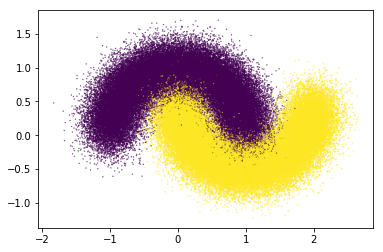

In [2]:
X, y = make_moons(n_samples=110000, noise=0.2)
print(X.shape, y.shape)
plt.scatter(X[:,0],X[:,1],s=0.1,c=y)

In [3]:
train_size = 100000
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

In [4]:
# create Voting classifier
tree_clf = DecisionTreeClassifier(max_depth=1)
linearSVC = LinearSVC()
logistic_clf = LogisticRegression()
voting_clf = VotingClassifier(estimators=[("tree", tree_clf), ("linearSVC", linearSVC), ("logistic",logistic_clf)],n_jobs=-1)

In [5]:
for clf in (tree_clf, linearSVC, logistic_clf, voting_clf):
    clf.fit(X_train, y_train)
    pred_test = clf.predict(X_test)
    print(clf.__class__.__name__, np.mean(pred_test==y_test))
# voting ensemble doesn't seem very promising

DecisionTreeClassifier 0.8255
LinearSVC 0.8705
LogisticRegression 0.8713
VotingClassifier 0.8713


In [12]:
# create Bagging classifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=100,n_jobs=-1,max_samples=0.01)

In [14]:
# train and test
for clf in (DecisionTreeClassifier(max_depth=1), bagging_clf):
    clf.fit(X_train, y_train)
    pred_test = clf.predict(X_test)
    print(clf.__class__.__name__, np.mean(pred_test==y_test))

DecisionTreeClassifier 0.8255
BaggingClassifier 0.9139
